# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint

In [2]:
import dendrotweaks as dd

In [3]:
# morphology
dd.morphology.Node
dd.morphology.Tree
dd.morphology.SWCNode
dd.morphology.SWCTree
dd.morphology.Section
dd.morphology.SectionTree
dd.morphology.Segment
dd.morphology.SegmentTree

dendrotweaks.morphology.seg_trees.SegmentTree

In [4]:
# membrane
dd.membrane.Mechanism
dd.membrane.SectionGroup
dd.membrane.Distribution

dendrotweaks.membrane.distributions.Distribution

In [5]:
# stimuli
dd.stimuli.IClamp
dd.stimuli.Synapse
dd.stimuli.Population

dendrotweaks.stimuli.populations.Population

In [6]:
dd.Model
dd.NEURONSimulator

dendrotweaks.simulators.NEURONSimulator

# Create a Model

In [7]:
import os
cwd = os.getcwd()
path_to_data = os.path.join(cwd, 'data')

In [8]:
model = dd.Model(name='Park_2019', 
                 path_to_data=path_to_data)

## Load morphology from SWC

In [9]:
model.path_manager.print_directory_tree('swc')

├── E_6_15_in_um_extended.swc
├── Hay_2011.swc
├── L5Jax_3PS.swc
├── Park_2019.swc
├── Poirazi_2003.swc
├── SST_Allen_full.swc
├── Smith_2013_cat.swc
├── ball-and-stick.swc
└── final_figure_extra-000.swc


In [10]:
file_name = 'Park_2019'
# file_name = 'Hay_2011'
# file_name = 'ball-and-stick'

In [11]:
model.from_swc(file_name)

Connecting tree.
  Elapsed time: 0.09 seconds
Extended 44 nodes.
Connecting tree.


In [12]:
model.sec_tree.topology()

parent |   idx
---------------
    -1 |   •0
     0 |   ├─•1
     0 |   ├─•2
     0 |   ├─•3
     0 |   ├─•4
     0 |   ├─•5
     0 |   ├─•6
     6 |   │ ├─•7
     6 |   │ └─•8
     0 |   └─•9
     9 |     ├─•10
    10 |     │ ├─•11
    11 |     │ │ ├─•12
    11 |     │ │ └─•13
    10 |     │ └─•14
    14 |     │   ├─•15
    14 |     │   └─•16
     9 |     └─•17
    17 |       ├─•18
    18 |       │ ├─•19
    19 |       │ │ ├─•20
    19 |       │ │ └─•21
    21 |       │ │   ├─•22
    21 |       │ │   └─•23
    23 |       │ │     ├─•24
    23 |       │ │     └─•25
    18 |       │ └─•26
    26 |       │   ├─•27
    26 |       │   └─•28
    28 |       │     ├─•29
    28 |       │     └─•30
    30 |       │       ├─•31
    30 |       │       └─•32
    17 |       └─•33
    33 |         ├─•34
    34 |         │ ├─•35
    34 |         │ └─•36
    33 |         └─•37
    37 |           ├─•38
    37 |           └─•39
    39 |             ├─•40
    40 |             │ ├─•41
    40 |             

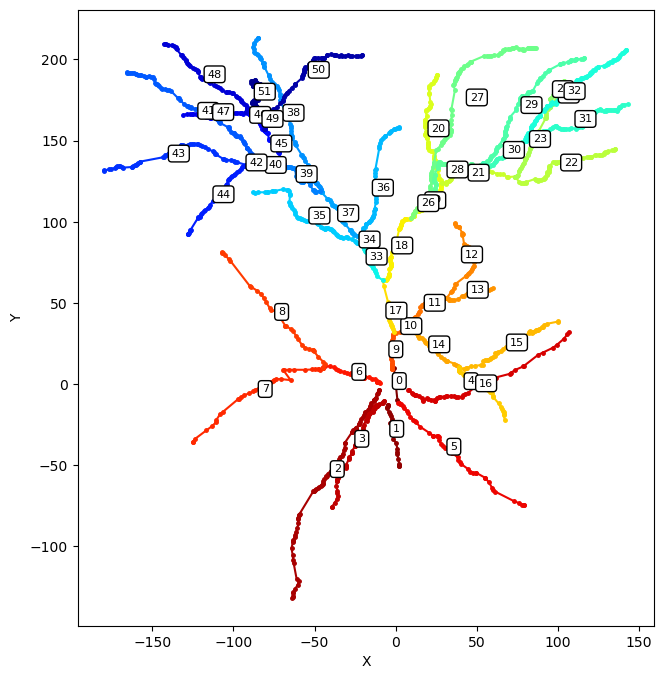

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=True)

## Create and reference sections

In [14]:
model.create_and_reference_sections_in_simulator()

Building sections in NEURON...
52 sections created.
Connecting tree.


## Add Mechanisms

In [15]:
model.path_manager.print_directory_tree('mod')

├── Default
│   ├── Leak
│   │   ├── Leak.mod
│   │   └── x86_64
│   └── Leak.mod
├── Park_2019
│   ├── CaHVA.mod
│   ├── CaLVA.mod
│   ├── KCa.mod
│   ├── Ka.mod
│   ├── Km.mod
│   ├── Kv.mod
│   ├── Na
│   │   ├── Na.mod
│   │   └── x86_64
│   ├── Na.mod
│   └── x86_64
├── Park_test
│   ├── Kv
│   │   ├── Kv.mod
│   │   └── x86_64
│   ├── Kv.mod
│   ├── Na
│   │   ├── Na.mod
│   │   └── x86_64
│   └── Na.mod
├── Synapses
│   ├── AMPA
│   │   ├── AMPA.mod
│   │   └── x86_64
│   ├── AMPA.mod
│   ├── AMPA_NMDA
│   │   ├── AMPA_NMDA.mod
│   │   └── x86_64
│   ├── AMPA_NMDA.mod
│   ├── GABAa
│   │   ├── GABAa.mod
│   │   └── x86_64
│   ├── GABAa.mod
│   ├── NMDA
│   │   ├── NMDA.mod
│   │   └── x86_64
│   ├── NMDA.mod
│   ├── vecstim
│   │   ├── vecstim.mod
│   │   └── x86_64
│   ├── vecstim.mod
│   └── x86_64
├── sKv.mod
└── sNa.mod


The choice here is:
- load all, add where needed (new, faster!)
- load one, add everywhere (old)

In [16]:
model.add_archive(archive_name='Default')

Mechanism Leak added to model.
Adding mechanism Leak to model...
Compiling mechanism "Leak"...
/home/roman/Documents/code/DendroTweaks/app/src/data/mod/Default/Leak
Mod files: "./Leak.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../Leak.mod
 -> Compiling Leak.c


/home/roman/anaconda3/envs/dendrotweaks/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating Leak.mod into /home/roman/Documents/code/DendroTweaks/app/src/data/mod/Default/Leak/x86_64/Leak.c
Thread Safe


 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special
Compiled mod files from "/home/roman/Documents/code/DendroTweaks/app/src/data/mod/Default/Leak"
Loaded mechanism "Leak"
Mechanism Leak loaded to NEURON.



In [17]:
model.add_archive('Park_test')

Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/python/Na.py
Registering Na from Na in /home/roman/Documents/code/DendroTweaks/app/src/data/python
Importing class Na from module Na.py
Mechanism Na added to model.
Adding mechanism Na to model...
Compiling mechanism "Na"...
/home/roman/Documents/code/DendroTweaks/app/src/data/mod/Park_test/Na
Mod files: "./Na.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../Na.mod
 -> Compiling Na.c


/home/roman/anaconda3/envs/dendrotweaks/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating Na.mod into /home/roman/Documents/code/DendroTweaks/app/src/data/mod/Park_test/Na/x86_64/Na.c
Thread Safe


 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special
Compiled mod files from "/home/roman/Documents/code/DendroTweaks/app/src/data/mod/Park_test/Na"
Loaded mechanism "Na"
Mechanism Na loaded to NEURON.

Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/python/Kv.py
Registering Kv from Kv in /home/roman/Documents/code/DendroTweaks/app/src/data/python
Importing class Kv from module Kv.py
Mechanism Kv added to model.
Adding mechanism Kv to model...
Compiling mechanism "Kv"...


/home/roman/anaconda3/envs/dendrotweaks/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating Kv.mod into /home/roman/Documents/code/DendroTweaks/app/src/data/mod/Park_test/Kv/x86_64/Kv.c
Thread Safe


/home/roman/Documents/code/DendroTweaks/app/src/data/mod/Park_test/Kv
Mod files: "./Kv.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../Kv.mod
 -> Compiling Kv.c
 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special
Compiled mod files from "/home/roman/Documents/code/DendroTweaks/app/src/data/mod/Park_test/Kv"
Loaded mechanism "Kv"
Mechanism Kv loaded to NEURON.



In [18]:
model.mechanisms

{'Leak': <dendrotweaks.membrane.mechanisms.LeakChannel at 0x7f60ecf83850>,
 'Na': <Na.Na at 0x7f60efdbca10>,
 'Kv': <Kv.Kv at 0x7f60eded9890>}

In [19]:
model.global_params

{'cm': 1, 'Ra': 100, 'ena': 50, 'ek': -77, 'eca': 140}

In [20]:
model.params

{'cm': 1, 'Ra': 100, 'ena': 50, 'ek': -77, 'eca': 140}

In [21]:
model.params_to_mechs

{'cm': 'Independent',
 'Ra': 'Independent',
 'ena': 'Independent',
 'ek': 'Independent',
 'eca': 'Independent'}

In [22]:
model.mechs_to_params

{'Independent': ['cm', 'Ra', 'ena', 'ek', 'eca']}

## Add groups

In [23]:
# Add a group of all sections
model.add_group('all')

In [24]:
model.add_group('soma', lambda sec: sec.domain == 'soma')

In [25]:
model._groups

[Group("all", 52), Group("soma", 1)]

In [26]:
model.params

{'cm': 1, 'Ra': 100, 'ena': 50, 'ek': -77, 'eca': 140}

## Segmentation

### Set independent parameters

In [27]:
model.make_distributed('cm')

In [28]:
model.distributed_params

{'cm': {'all': uniform({'value': 1}), 'soma': uniform({'value': 1})}}

In [29]:
model.set_distributed_param(param_name='cm', 
                            group_name='all',
                            distr_type = 'uniform', value=1)
model.set_distributed_param(param_name='cm', 
                            group_name='soma',
                            distr_type = 'uniform', value=2)

In [30]:
model.distribute('cm')

In [31]:
model.set_global_param('Ra', 100)

In [32]:
for sec in model.sec_tree:
    print(sec.idx)
    print(sec._ref.cm, sec._ref.Ra)
    if sec.idx >= 1:
        break

0
2.0 100.0
1
1.0 100.0


In [33]:
model.global_params

{'Ra': 100, 'ena': 50, 'ek': -77, 'eca': 140}

### Create seg tree

In [34]:
d_lambda = 0.1
model.set_segmentation(d_lambda=0.1)

Connecting tree.


In [35]:
model.seg_tree

Tree [•0, •1, •2, •3, •4, •5, •6, •7, •8, •9, •10, •11, •12, •13, •14, •15, •16, •17, •18, •19, •20, •21, •22, •23, •24, •25, •26, •27, •28, •29, •30, •31, •32, •33, •34, •35, •36, •37, •38, •39, •40, •41, •42, •43, •44, •45, •46, •47, •48, •49, •50, •51, •52, •53, •54, •55, •56, •57, •58, •59, •60, •61, •62, •63, •64, •65, •66, •67, •68, •69, •70, •71, •72, •73, •74, •75, •76, •77, •78, •79, •80, •81, •82, •83, •84, •85, •86, •87, •88, •89, •90, •91, •92, •93, •94, •95, •96, •97, •98, •99, •100, •101, •102, •103, •104, •105, •106, •107, •108, •109, •110, •111, •112, •113, •114, •115, •116, •117, •118, •119, •120, •121, •122, •123, •124, •125, •126, •127, •128, •129, •130, •131, •132, •133, •134, •135, •136, •137, •138, •139, •140, •141, •142, •143, •144, •145, •146, •147, •148, •149, •150, •151, •152, •153, •154, •155, •156, •157, •158, •159, •160, •161, •162, •163, •164, •165, •166, •167, •168, •169, •170, •171, •172, •173, •174, •175, •176, •177, •178, •179, •180, •181, •182, •183, 

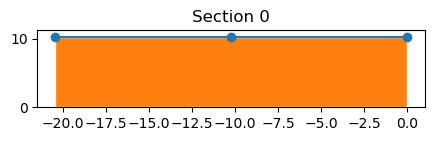

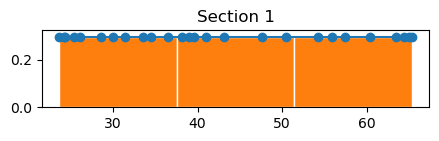

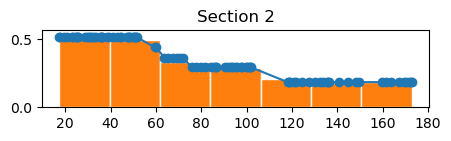

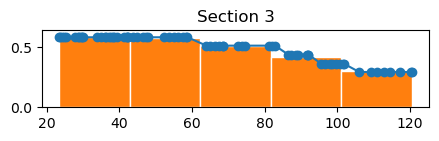

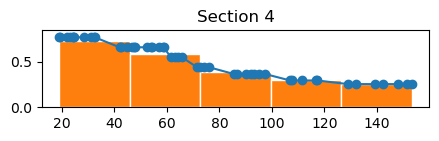

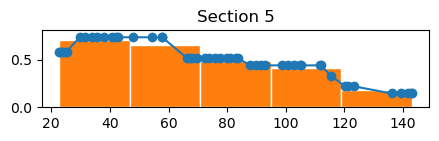

In [36]:
for sec in model.sec_tree.sections:
        fig, ax = plt.subplots(figsize=(5, 1))
        sec.plot_radii(ax)
        ax.set_title(f'Section {sec.idx}')
        if sec.idx >= 5:
            break

In [37]:
len(model.seg_tree)

186

## Insert mechanisms

In [38]:
model.insert_mechanism('Leak', group_name='all')
model.insert_mechanism('Na', group_name='all')
model.insert_mechanism('Na', group_name='soma')
model.insert_mechanism('Kv', group_name='all')
model.insert_mechanism('Kv', group_name='soma')

## Distribute mech parameters

In [39]:
model.make_distributed('gbar_Leak')
model.make_distributed('gbar_Na')
model.make_distributed('gbar_Kv')

In [40]:
model.mechs_to_params

{'Independent': ['cm', 'Ra', 'ena', 'ek', 'eca'],
 'Leak': ['gbar_Leak', 'e_Leak'],
 'Na': ['gbar_Na',
  'Rma_Na',
  'Rmb_Na',
  'v12m_Na',
  'qm_Na',
  'Rhb_Na',
  'Rha_Na',
  'v12ha_Na',
  'v12hb_Na',
  'qh_Na',
  'v12hinf_Na',
  'qhinf_Na',
  'temp_Na',
  'q10_Na'],
 'Kv': ['gbar_Kv', 'Ra_Kv', 'Rb_Kv', 'v12_Kv', 'q_Kv', 'temp_Kv', 'q10_Kv']}

In [41]:
model.distributed_params

{'cm': {'all': uniform({'value': 1}), 'soma': uniform({'value': 2})},
 'gbar_Leak': {'all': uniform({'value': 0.0})},
 'gbar_Na': {'all': uniform({'value': 0.0}), 'soma': uniform({'value': 0.0})},
 'gbar_Kv': {'all': uniform({'value': 0.0}), 'soma': uniform({'value': 0.0})}}

In [42]:
model.set_distributed_param(param_name='gbar_Leak',
                       group_name='all',
                       distr_type = 'uniform', value=0.0001)

In [43]:
model.set_distributed_param(param_name='gbar_Na',
                       group_name='all',
                       distr_type = 'uniform', value=0.03)
model.set_distributed_param(param_name='gbar_Na',
                       group_name='soma',
                       distr_type = 'uniform', value=0.05)

In [44]:
model.set_distributed_param(param_name='gbar_Kv',
                       group_name='all', 
                       distr_type = 'uniform', value=0.003)
model.set_distributed_param(param_name='gbar_Kv',
                       group_name='soma', 
                       distr_type = 'uniform', value=0.005)

In [45]:
pprint(model.distributed_params)

{'cm': {'all': uniform({'value': 1}), 'soma': uniform({'value': 2})},
 'gbar_Kv': {'all': uniform({'value': 0.003}),
             'soma': uniform({'value': 0.005})},
 'gbar_Leak': {'all': uniform({'value': 0.0001})},
 'gbar_Na': {'all': uniform({'value': 0.03}), 'soma': uniform({'value': 0.05})}}


In [46]:
model.mechs_to_params

{'Independent': ['cm', 'Ra', 'ena', 'ek', 'eca'],
 'Leak': ['gbar_Leak', 'e_Leak'],
 'Na': ['gbar_Na',
  'Rma_Na',
  'Rmb_Na',
  'v12m_Na',
  'qm_Na',
  'Rhb_Na',
  'Rha_Na',
  'v12ha_Na',
  'v12hb_Na',
  'qh_Na',
  'v12hinf_Na',
  'qhinf_Na',
  'temp_Na',
  'q10_Na'],
 'Kv': ['gbar_Kv', 'Ra_Kv', 'Rb_Kv', 'v12_Kv', 'q_Kv', 'temp_Kv', 'q10_Kv']}

In [47]:
model.info()

Model: Park_2019
Path to data: /home/roman/Documents/code/DendroTweaks/app/src/data
Simulator: NEURON
Groups: 2
Mechanisms: 3
IClamps: 0



In [48]:
model.distributed_params

{'cm': {'all': uniform({'value': 1}), 'soma': uniform({'value': 2})},
 'gbar_Leak': {'all': uniform({'value': 0.0001})},
 'gbar_Na': {'all': uniform({'value': 0.03}),
  'soma': uniform({'value': 0.05})},
 'gbar_Kv': {'all': uniform({'value': 0.003}),
  'soma': uniform({'value': 0.005})}}

In [49]:
# model.add_group('axon', lambda sec: sec.domain == 'axon')

## Problem with diams

In [50]:
# Section diam in NEURON
sec._ref.diam

0.9730643074640786

In [51]:
# diam of each segment in NEURON
seg_diams = np.array([seg.diam for seg in sec._ref])
print(f'{seg_diams.size} segments with diam {seg_diams.mean()}')

5 segments with diam 0.9746563460933271


In [52]:
# diam of each pt3d in neuron
pts3d_diams = np.array([sec._ref.diam3d(i) for i in range(sec._ref.n3d())])
print(f'{pts3d_diams.size} pt3d with diam {pts3d_diams.mean()}')

49 pt3d with diam 0.9991836675575801


In [53]:
# diam of each pt3d in custom section
swc_diams = np.array([2*pt.r for pt in sec.pts3d])
print(f'{swc_diams.size} pt3d with diam {swc_diams.mean()}')

49 pt3d with diam 0.9991836734693877


In [54]:
for i, (swc_diam, neuron_diam) in enumerate(zip(swc_diams, pts3d_diams)):
    print(f'{swc_diam} {neuron_diam}')
    if i > 10 : break

1.17 1.1699999570846558
1.17 1.1699999570846558
1.17 1.1699999570846558
1.17 1.1699999570846558
1.17 1.1699999570846558
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295
1.47 1.4700000286102295


In [55]:
# from core.utils import calculate_lambda_f
# from neuron import h
# h.load_file('stdrun.hoc')
# f = 100
# for sec in model.sec_tree.sections:
#     neuron_sec = sec._ref
#     # diam = neuron_sec.diam
#     diam = np.array([seg.diam for seg in sec._ref]).mean()
#     lambda_f = calculate_lambda_f(diam, neuron_sec.Ra, neuron_sec.cm)
#     lambda_f_neuron = h.lambda_f(f, sec=neuron_sec)
#     nseg = int((neuron_sec.L / (0.1 * lambda_f) + 0.9) / 2) * 2 + 1
#     # print(f'Section {sec.idx} has {nseg} segments with lambda_f = {lambda_f:.5f} um')
#     nseg_neuron = int((neuron_sec.L / (0.1 * lambda_f_neuron) + 0.9) / 2) * 2 + 1
#     # print(f'Section {sec.idx} has {nseg} segments with lambda_f = {lambda_f_neuron:.5f} um')
#     # print(f'Neuron lambda_f = {lambda_f_neuron:.5f} um, calculated lambda_f = {lambda_f:.5f} um')
#     print(f'Neuron nseg = {nseg_neuron}, calculated nseg = {nseg}')

# Problem with nseg

Text(0.5, 1.0, 'Correspondence between nseg and length')

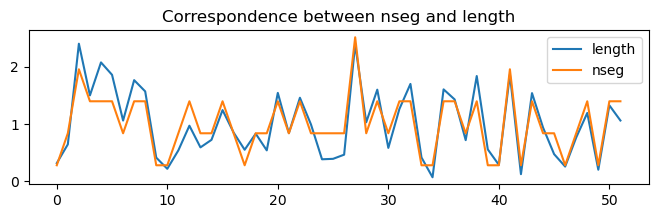

In [56]:
fig, ax = plt.subplots(figsize=(8, 2))
sec_ids = np.array([sec.idx for sec in model.sec_tree.sections])
sec_nseg = np.array([sec._ref.nseg for sec in model.sec_tree.sections])
sec_diams = np.array([np.array([seg.diam for seg in sec._ref]).mean() for sec in model.sec_tree.sections])
# sec_cm = np.array([sec._ref.cm for sec in model.sec_tree.sections])
# sec_Ra = np.array([sec._ref.Ra for sec in model.sec_tree.sections])
sec_lenghts = np.array([sec._ref.L for sec in model.sec_tree.sections])
# draw a vertical line between nseg and length datapoints for each section

sec_nseg = sec_nseg / sec_nseg.mean()
sec_lenghts = sec_lenghts / sec_lenghts.mean()

ys = sec_nseg - sec_lenghts

# ax.vlines(sec_ids, sec_nseg, sec_lenghts, color='k', label='nseg')
ax.plot(sec_ids, sec_lenghts, '-', label='length')
ax.plot(sec_ids, sec_nseg, '-', label='nseg')
# ax.stem(sec_ids, ys, use_line_collection=True)
ax.legend()
ax.set_title('Correspondence between nseg and length')

In [57]:
for sec in model.sec_tree.sections:
    print(f'Section {sec.idx} has {sec._ref.nseg} segments')

Section 0 has 1 segments
Section 1 has 3 segments
Section 2 has 7 segments
Section 3 has 5 segments
Section 4 has 5 segments
Section 5 has 5 segments
Section 6 has 3 segments
Section 7 has 5 segments
Section 8 has 5 segments
Section 9 has 1 segments
Section 10 has 1 segments
Section 11 has 3 segments
Section 12 has 5 segments
Section 13 has 3 segments
Section 14 has 3 segments
Section 15 has 5 segments
Section 16 has 3 segments
Section 17 has 1 segments
Section 18 has 3 segments
Section 19 has 3 segments
Section 20 has 5 segments
Section 21 has 3 segments
Section 22 has 5 segments
Section 23 has 3 segments
Section 24 has 3 segments
Section 25 has 3 segments
Section 26 has 3 segments
Section 27 has 9 segments
Section 28 has 3 segments
Section 29 has 5 segments
Section 30 has 3 segments
Section 31 has 5 segments
Section 32 has 5 segments
Section 33 has 1 segments
Section 34 has 1 segments
Section 35 has 5 segments
Section 36 has 5 segments
Section 37 has 3 segments
Section 38 has 5 segme

# Mechanisms kinetics

Got data for v in range -100.0 to 100.0 at 37°C
Got data for v in range -100.0 to 100.0 at 37°C


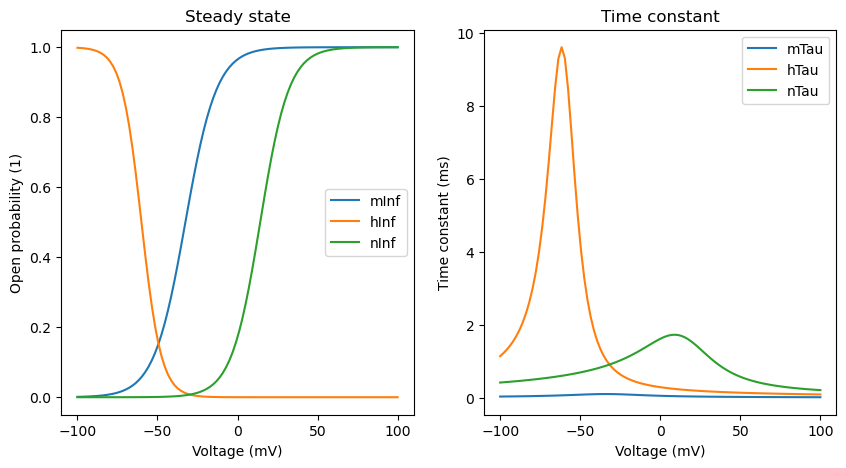

In [58]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
model.mechanisms['Na'].plot_kinetics(ax)
model.mechanisms['Kv'].plot_kinetics(ax)

# Simulate

In [83]:
model.set_global_param('e_Leak', -79)
model.set_global_param('ena', 60)
model.set_global_param('ek', -80)
model.set_global_param('celsius', 37)
model.set_global_param('v_init', -79)

In [84]:
model.recordings

{•0: Vector[0]}

In [61]:
soma = model.sec_tree.soma

In [62]:
soma.segments

[•0]

In [63]:
sec = model.sec_tree.sections[2]
sec.segments

[•4, •5, •6, •7, •8, •9, •10]

In [64]:
sec.seg_centers/sec.length

array([0.07142857, 0.21428572, 0.35714287, 0.50000001, 0.64285716,
       0.78571431, 0.92857145])

In [65]:
model.add_recording(soma, loc=0.5)

In [66]:
model.simulator.recordings

{•0: Vector[0]}

In [67]:
model.remove_all_iclamps()
# model.add_iclamp(soma, loc=0.5, amp=0.15, delay=100, dur=100)

In [85]:
model.iclamps

{}

In [86]:
t, v, _ = model.simulator.run(duration=300)

(-100.0, 60.0)

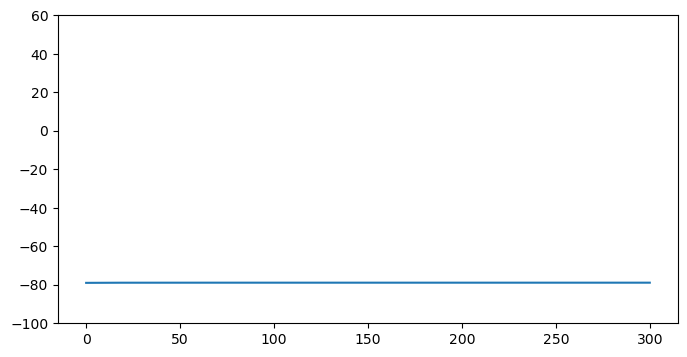

In [87]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t[0], v[0])
ax.set_ylim(-100, 60)

In [71]:
pprint(model.to_dict(), sort_dicts=False)

{'metadata': {'name': 'Park_2019'},
 'simulation': {'d_lambda': 0.1, 'temperature': 37, 'v_init': -79, 'dt': 0.025},
 'global_params': {'Ra': 100,
                   'ena': 50,
                   'ek': -77,
                   'eca': 140,
                   'e_Leak': -70,
                   'Rma_Na': 0.182,
                   'Rmb_Na': 0.14,
                   'v12m_Na': -30,
                   'qm_Na': 9.8,
                   'Rhb_Na': 0.0091,
                   'Rha_Na': 0.024,
                   'v12ha_Na': -45,
                   'v12hb_Na': -70,
                   'qh_Na': 5,
                   'v12hinf_Na': -60,
                   'qhinf_Na': 6.2,
                   'temp_Na': 23,
                   'q10_Na': 2.3,
                   'Ra_Kv': 0.02,
                   'Rb_Kv': 0.006,
                   'v12_Kv': 25,
                   'q_Kv': 9,
                   'temp_Kv': 23,
                   'q10_Kv': 2.3},
 'distributed_params': {'cm': {'all': uniform({'value': 1}),
         

# Synapses

In [72]:
model.path_manager.print_directory_tree('mod')

├── Default
│   ├── Leak
│   │   ├── Leak.mod
│   │   └── x86_64
│   └── Leak.mod
├── Park_2019
│   ├── CaHVA.mod
│   ├── CaLVA.mod
│   ├── KCa.mod
│   ├── Ka.mod
│   ├── Km.mod
│   ├── Kv.mod
│   ├── Na
│   │   ├── Na.mod
│   │   └── x86_64
│   ├── Na.mod
│   └── x86_64
├── Park_test
│   ├── Kv
│   │   ├── Kv.mod
│   │   └── x86_64
│   ├── Kv.mod
│   ├── Na
│   │   ├── Na.mod
│   │   └── x86_64
│   └── Na.mod
├── Synapses
│   ├── AMPA
│   │   ├── AMPA.mod
│   │   └── x86_64
│   ├── AMPA.mod
│   ├── AMPA_NMDA
│   │   ├── AMPA_NMDA.mod
│   │   └── x86_64
│   ├── AMPA_NMDA.mod
│   ├── GABAa
│   │   ├── GABAa.mod
│   │   └── x86_64
│   ├── GABAa.mod
│   ├── NMDA
│   │   ├── NMDA.mod
│   │   └── x86_64
│   ├── NMDA.mod
│   ├── vecstim
│   │   ├── vecstim.mod
│   │   └── x86_64
│   ├── vecstim.mod
│   └── x86_64
├── sKv.mod
└── sNa.mod


In [73]:
model.load_archive('Synapses', recompile=False)

Adding mechanism vecstim to model...
Using precompiled mechanism "vecstim"
Loaded mechanism "vecstim"
Mechanism vecstim loaded to NEURON.

Adding mechanism AMPA_NMDA to model...
Using precompiled mechanism "AMPA_NMDA"
Loaded mechanism "AMPA_NMDA"
Mechanism AMPA_NMDA loaded to NEURON.

Adding mechanism AMPA to model...
Using precompiled mechanism "AMPA"
Loaded mechanism "AMPA"
Mechanism AMPA loaded to NEURON.

Adding mechanism GABAa to model...
Using precompiled mechanism "GABAa"
Loaded mechanism "GABAa"
Mechanism GABAa loaded to NEURON.

Adding mechanism NMDA to model...
Using precompiled mechanism "NMDA"
Loaded mechanism "NMDA"
Mechanism NMDA loaded to NEURON.



In [74]:
model.add_population(
    segments=model.seg_tree.segments, 
    N=5, 
    syn_type='AMPA'
)

In [75]:
pop = model.populations['AMPA']['AMPA_0']

Text(0, 0.5, 'Number of synapses')

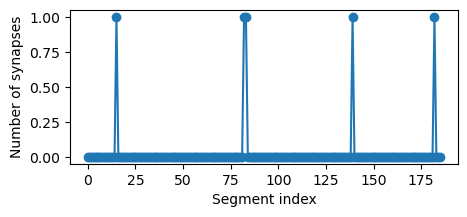

In [76]:
fig, ax = plt.subplots(figsize=(5, 2))
# histogram of synapse N per secton (pop.n_per_sec)
plt.plot([v for k,v in pop.n_per_seg.items()], 'o-');
plt.xlabel('Segment index')
plt.ylabel('Number of synapses')

In [77]:
pop.create_inputs()

In [78]:
pop.update_input_params({'rate':100, 'weight':1, 'noise':1})

In [80]:
model.remove_population('AMPA_0')

In [81]:
print(json.dumps(pop.to_dict(), indent=4))

{
    "population": {
        "name": "AMPA_0",
        "input_params": {
            "rate": 100,
            "noise": 1,
            "start": 100,
            "end": 200,
            "weight": 1,
            "delay": 0
        },
        "kinetic_params": {
            "gmax": 0.001,
            "tau_rise": 0.2,
            "tau_decay": 1.4,
            "e": 0,
            "gamma": 0.062,
            "mu": 0.28
        },
        "syn_type": "AMPA",
        "synapses": []
    }
}
